In [60]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

base_root = "../data/original/"
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

## Merge datasets

In [61]:
train_identity = pd.read_csv(base_root + "train_identity.csv")
train_transaction = pd.read_csv(base_root + "train_transaction.csv")
# let's combine the data and work with the whole dataset
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
train.set_index('TransactionID', inplace=True)
print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
del train_identity, train_transaction

Train dataset has 590540 rows and 433 columns.


## Drop the columns with 85% or more null values
The transaction table has more cases of missing data. 55 of the 394 features have more than 80% missing data, and 113 features have missing data between 70% and 80%. Similar missing data patterns were found among features which have consecutive names. Specifically, the missing data rates of "D6"-"D9" and "D12"-"D14" were all above 87.3122%. The missing data rate of "D6" - "D9" and "D12" - "D14" was above 87.3122%. The missing data rate for "V138" - "V166" is between 86.1227% and 86.1237%. All features from "V323" to "V339" have missing data rate of 86.054967%. This regularity exhibited in the missing data suggests that there may have a strong correlation between these consecutive numerically arranged features, although the data provider does not explain the specific meaning expressed by these encrypted features.

In [62]:
droplist = train.columns[(train.isna().sum() / len(train)) >= 0.85]
print(droplist)
# Drop variables
train.drop(droplist, axis=1, inplace=True)
print(f'Train dataset now has {train.shape[0]} rows and {train.shape[1]} columns.')

Index(['dist2', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138', 'V139',
       'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148',
       'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157',
       'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166',
       'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330',
       'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339',
       'id_03', 'id_04', 'id_07', 'id_08', 'id_09', 'id_10', 'id_14', 'id_18',
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_30',
       'id_32', 'id_33', 'id_34'],
      dtype='object')
Train dataset now has 590540 rows and 359 columns.


## Clean up the features based on their email domain (“P_emaildomain” and “R_emaildomain”)
we need to clean up the features based on their email domain (“P_emaildomain” and “R_emaildomain”). Because some of the email domain will separate from the different countries. For example, “yahoo.co.jp”, “yahoo.de”, “yahoo.fr”. What we need here is just the information of email provider. So, all three records above will be converted to “yahoo”

In [63]:
for col in ['P_emaildomain','R_emaildomain']:
    # For train
    train.loc[train[col].isin(['yahoo.co.jp','yahoo.co.uk', 'yahoo.com', 'yahoo.com.mx', 'yahoo.de', 'yahoo.es',
       'yahoo.fr', 'ymail.com']),col] = "Yahoo"
    train.loc[train[col].isin(['gmail','gmail.com']),col] = "Gmail"
    train.loc[train[col].isin(['hotmail.co.uk','hotmail.com','hotmail.de', 'hotmail.es', 'hotmail.fr']),col] = "Hotmail"
    train.loc[train[col].isin(['live.com', 'live.com.mx', 'live.fr']),col] = "Live"
    train.loc[train[col].isin(['outlook.com', 'outlook.es']),col] = "Outlook"
    train.loc[train[col].isin(['netzero.com', 'netzero.net']),col] = "Netzero"
    train.loc[train[col].isin(['frontier.com', 'frontiernet.net']),col] = "Frontiernet"

In [64]:
# check
p = train['P_emaildomain'].unique()
p_new = p[~pd.isnull(p)]
p_new.sort()
p_new

array(['Frontiernet', 'Gmail', 'Hotmail', 'Live', 'Netzero', 'Outlook',
       'Yahoo', 'aim.com', 'anonymous.com', 'aol.com', 'att.net',
       'bellsouth.net', 'cableone.net', 'centurylink.net', 'cfl.rr.com',
       'charter.net', 'comcast.net', 'cox.net', 'earthlink.net',
       'embarqmail.com', 'gmx.de', 'icloud.com', 'juno.com', 'mac.com',
       'mail.com', 'me.com', 'msn.com', 'optonline.net', 'prodigy.net.mx',
       'protonmail.com', 'ptd.net', 'q.com', 'roadrunner.com',
       'rocketmail.com', 'sbcglobal.net', 'sc.rr.com', 'servicios-ta.com',
       'suddenlink.net', 'twc.com', 'verizon.net', 'web.de',
       'windstream.net'], dtype=object)

In [65]:
# check
p = train['R_emaildomain'].unique()
p_new = p[~pd.isnull(p)]
p_new.sort()
p_new

array(['Frontiernet', 'Gmail', 'Hotmail', 'Live', 'Netzero', 'Outlook',
       'Yahoo', 'aim.com', 'anonymous.com', 'aol.com', 'att.net',
       'bellsouth.net', 'cableone.net', 'centurylink.net', 'cfl.rr.com',
       'charter.net', 'comcast.net', 'cox.net', 'earthlink.net',
       'embarqmail.com', 'gmx.de', 'icloud.com', 'juno.com', 'mac.com',
       'mail.com', 'me.com', 'msn.com', 'optonline.net', 'prodigy.net.mx',
       'protonmail.com', 'ptd.net', 'q.com', 'roadrunner.com',
       'rocketmail.com', 'sbcglobal.net', 'sc.rr.com', 'scranton.edu',
       'servicios-ta.com', 'suddenlink.net', 'twc.com', 'verizon.net',
       'web.de', 'windstream.net'], dtype=object)

In [66]:
train["has_device"] = train["DeviceInfo"].isna().astype(np.uint8)
train["has_browser"] = train["id_31"].isna().astype(np.uint8)
train = train.drop(["id_31", "DeviceInfo", "DeviceType"], axis=1)

## Transfer “TransactionDT”
The variabele “TransactionDT” in the Transaction dataset is a timedelta from a given reference datetime (not an actual timestamp). The minimum value of “TransactionDT” is 86400 which corresponds to the number of seconds in a day (60*60*24 = 86400). Therefore, it is possible the unit of this variable is seconds. The maximum value of “TransactionDT” is 15811131. It is reasonable to conclude that the data spans 6 months (15811131-86400)/86400/30 = 6.066. 

In [67]:
train['TransactionDT'].value_counts()

9474817     8
11576951    5
4397066     5
7236588     5
1544629     4
           ..
4629634     1
4629631     1
4629557     1
4629466     1
15811131    1
Name: TransactionDT, Length: 573349, dtype: int64

In [68]:
print('The maximum value of TransactionDT is: ',train['TransactionDT'].max())
print('The minmun value of TransactionDT is: ',train['TransactionDT'].min())

The maximum value of TransactionDT is:  15811131
The minmun value of TransactionDT is:  86400


## (1) Transfer the unit of 'TransactionDT' from seconds to days

In [69]:
train['TransactionDT'] = (train['TransactionDT']/(60*60*24)).round(0)
train['TransactionDT'].value_counts()

93.0     6917
23.0     6847
25.0     6529
24.0     5868
22.0     5792
         ... 
150.0    2232
144.0    2210
179.0    2064
183.0    2017
1.0      1264
Name: TransactionDT, Length: 183, dtype: int64

## (2) Add a new column 'Trans_DayOfWeek' transfer the TransactionDT to day of week

In [70]:
train['Trans_DayOfWeek'] = (train['TransactionDT'] % 7).round(0)
train['Trans_DayOfWeek'].value_counts()

2.0    97839
1.0    86558
5.0    86301
0.0    85459
6.0    83766
3.0    75357
4.0    75260
Name: Trans_DayOfWeek, dtype: int64

In [71]:
train['Trans_DayOfWeek'].value_counts(dropna=False, normalize=True).plot(
    kind='barh',
    figsize=(15, 3),
    title='Count of Transactions by Week of Day'
)
plt.show()

<IPython.core.display.Javascript object>

## (3) Add a new column 'Trans_hours' transfer the TransactionDT to hours of day

In [72]:
train['Trans_hours'] = (train['TransactionDT'] % 24).round(0)
train['Trans_hours'].value_counts()

21.0    27292
2.0     26877
5.0     26148
1.0     26117
4.0     25518
6.0     25317
3.0     25268
11.0    24958
10.0    24765
13.0    24712
14.0    24544
20.0    24428
12.0    24391
0.0     24286
9.0     24198
23.0    24154
15.0    24078
7.0     24047
8.0     23993
22.0    23880
19.0    23598
16.0    23015
17.0    22808
18.0    22148
Name: Trans_hours, dtype: int64

In [73]:
train['Trans_hours'].value_counts(dropna=False, normalize=True).plot(
    kind='barh',
    figsize=(15, 9),
    title='Count of Transactions by values'
)
plt.show()

## Transforming categorical features --- OneHotEncoding


In [74]:
n_cols_before = train.shape[1]
cat_cols = train.select_dtypes(exclude=np.number).columns
one_hot_features = pd.get_dummies(train[cat_cols])
train = pd.concat(
    (train, one_hot_features), axis=1
)
train = train.drop(cat_cols, axis=1)
n_cols_after = train.shape[1]

print("Converted %d categorical variables" % len(cat_cols))
print("Added %d columns" % (n_cols_after - n_cols_before))

Converted 23 categorical variables
Added 113 columns


## Tackling class imbalance

/home/local/USHERBROOKE/verj2009/anaconda3/envs/ift780/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target variable count')

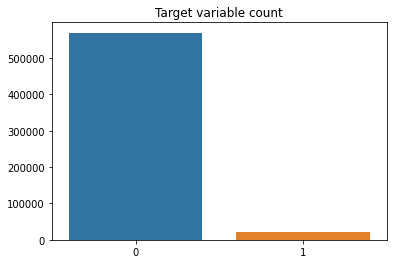

In [75]:
%matplotlib inline
x = train['isFraud'].value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

### Undersample majority class (for training dataset only)
removing some observations of the majority class

Text(0, 0.5, 'count')

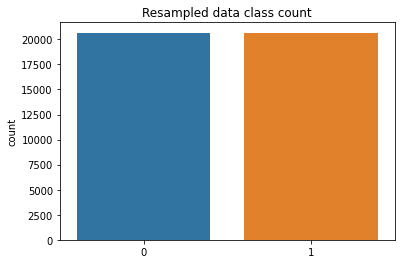

In [76]:
from imblearn.under_sampling import RandomUnderSampler

X = train.drop('isFraud', axis=1)
y = train['isFraud']

rus = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = rus.fit_resample(X, y)

df_balanced = pd.concat((X_balanced, y_balanced), axis=1)
sns.barplot(y=df_balanced.isFraud.value_counts(), x=[0, 1])
plt.title('Resampled data class count')
plt.ylabel('count')

### Normalize data --- Scikit-Learn’s MinMaxScaler
Another critical point here is that the KNN Imptuer is a distance-based imputation method and it requires us to normalize our data. Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values.

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_balanced = scaler.fit_transform(df_balanced)

## Missing value imputation --- K-Nearest Neighbors imputation method
https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
knn_features = imputer.fit_transform(df_balanced)
print("Final shape: {}".format(knn_features.shape))

In [ ]:
np.savez(base_root + "../fraud-detection-v2.npz", knn_features)

References: 
https://www.kaggle.com/code/artgor/eda-and-models

https://www.kaggle.com/code/robikscube/ieee-fraud-detection-first-look-and-eda/notebook

https://www.kaggle.com/code/shahules/tackling-class-imbalance#notebook-container

https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

https://www.kaggle.com/code/kanncaa1/feature-selection-and-data-visualization